# GRENOBLE ALPES METROPOLE TREES: MACHINE LEARNING MODELING

<span style="color:Orange">

<span style="color:Orange">

## Imports
</span>

In [1]:
import pandas as pd
import numpy as np

# Data
from gamt import data_process
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# ML
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
#from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#import joblib


# Plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 16

<span style="color:Orange">

## Data Preparation
</span>

In [2]:
df = data_process.clean_trees_data('arbres_grenoble_epsg4326')
df = df.drop(columns=['longitude', 'latitude'])
df['adr_secteur'] = df['adr_secteur'].astype(object)
df['geo_cluster'] = df['geo_cluster'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30144 entries, 0 to 31735
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sous_categorie        30144 non-null  object 
 1   code_parent           30144 non-null  object 
 2   adr_secteur           30144 non-null  object 
 3   genre_bota            30118 non-null  object 
 4   espece                28753 non-null  object 
 5   stadededeveloppement  27860 non-null  object 
 6   anneedeplantation     30144 non-null  float64
 7   collectivite          29948 non-null  object 
 8   hauteurarbre          19995 non-null  object 
 9   structure             29924 non-null  object 
 10  geo_cluster           30144 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.8+ MB


In [3]:
np.random.seed(42)

X = df.drop('anneedeplantation', axis=1)
y = df['anneedeplantation'].copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Shape of X train: ", X_train.shape)
print("Shape of X test: ", X_test.shape)

Shape of X train:  (24115, 10)
Shape of X test:  (6029, 10)


In [4]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder()),
        ('imputer', SimpleImputer(strategy='most_frequent'))
    ])

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", cat_pipeline, categorical_features),
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)

X_test_prepared = full_pipeline.transform(X_test)

<span style="color:Orange">

## Machine Learning Modeling
</span>

<span style="color:Orange">

### Linear Model
</span>

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

RMSE: 7.15
MAE: around 4.47 year


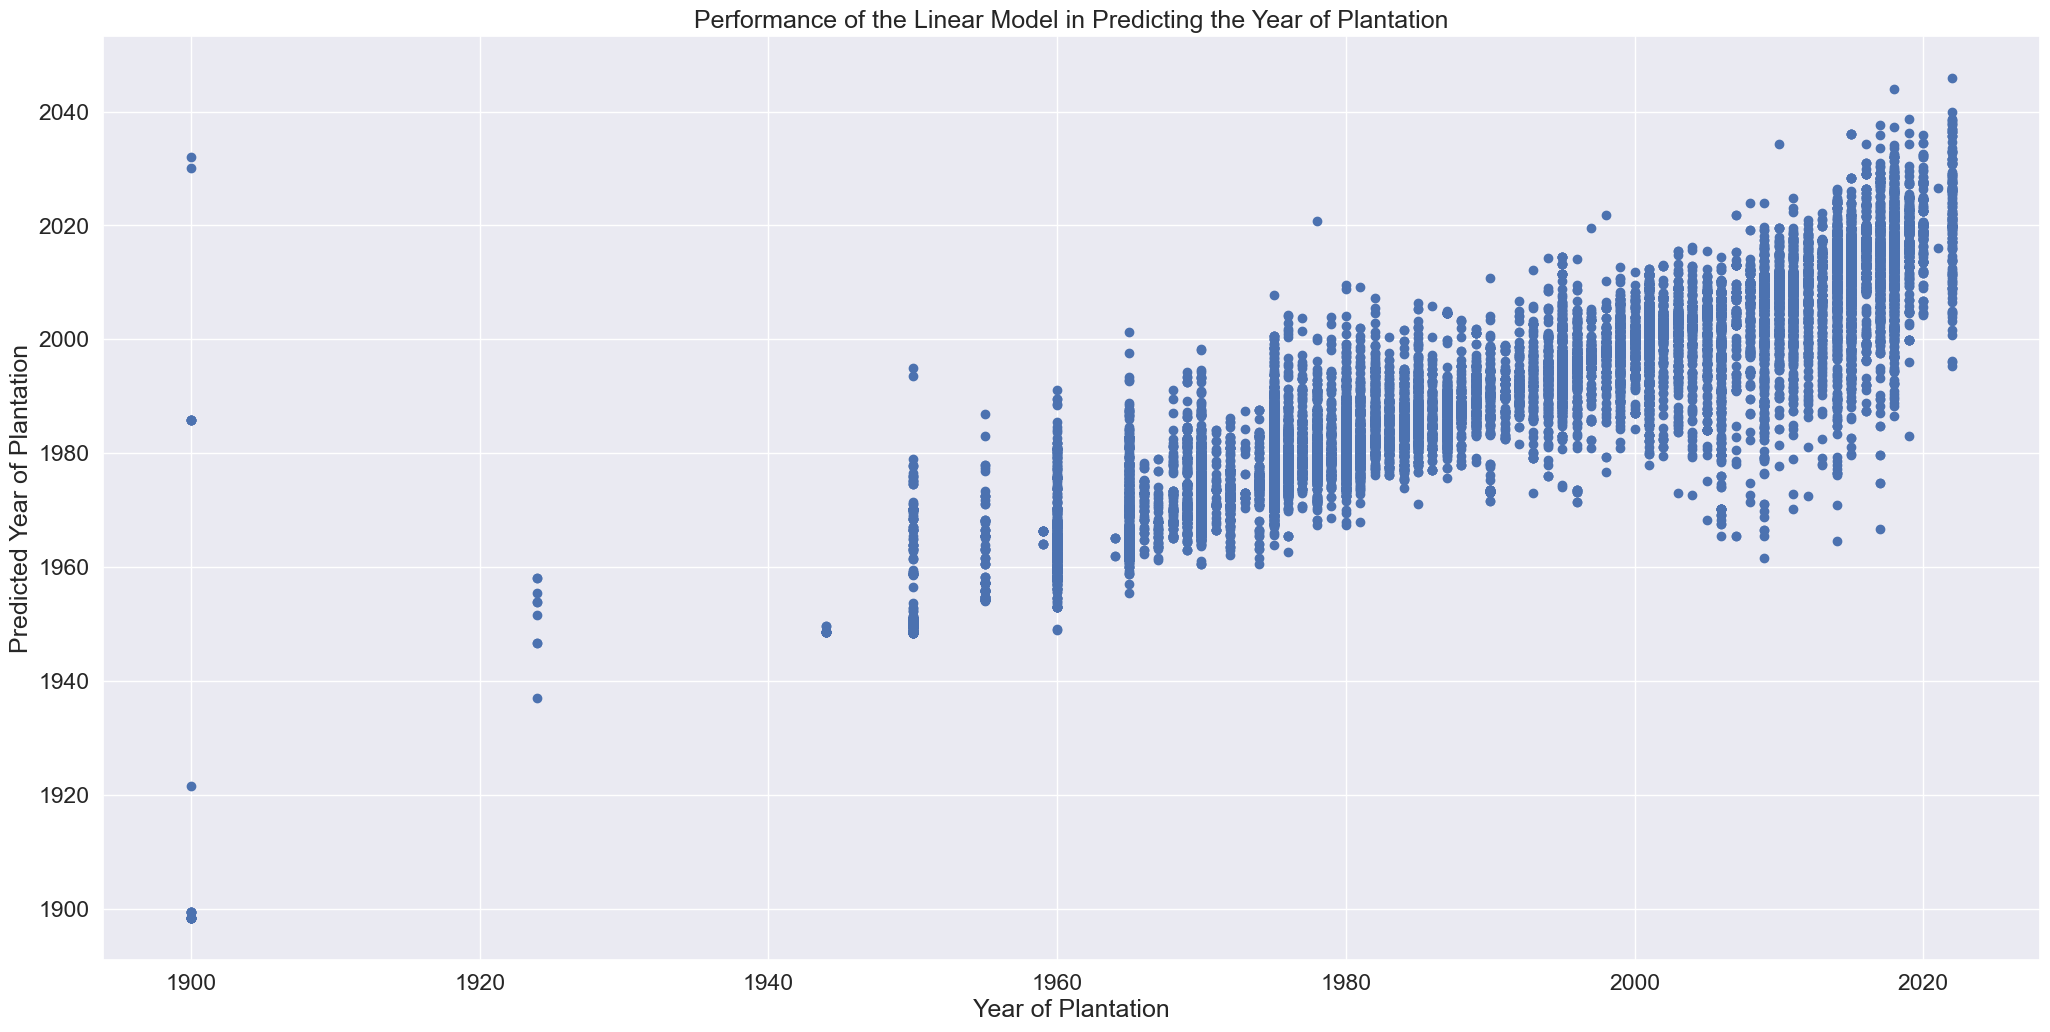

In [7]:
X_train_predictions = lin_reg.predict(X_train_prepared)

lin_rmse = mean_squared_error(y_train, X_train_predictions, squared=False)
lin_mae = mean_absolute_error(y_train, X_train_predictions)
print(f"RMSE: {round(lin_rmse,2)}")
print(f"MAE: around {round(lin_mae, 2)} year")

plt.scatter(y_train, X_train_predictions)
plt.xlabel("Year of Plantation")
plt.ylabel("Predicted Year of Plantation")
plt.title("Performance of the Linear Model in Predicting the Year of Plantation")
plt.show()

<span style="color:Orange">

### Decision Tree
</span>

In [8]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_prepared, y_train)

DecisionTreeRegressor()

In [9]:
X_train_predictions = tree_reg.predict(X_train_prepared)

tree_rmse = mean_squared_error(y_train, X_train_predictions, squared=False)
print(f"RMSE: {round(tree_rmse,2)}")

RMSE: 2.04


<span style="color:Orange">

### Random Forest
</span>

In [10]:
forest_reg = RandomForestRegressor(n_jobs=-1)
forest_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(n_jobs=-1)

RMSE: 2.74
MAE: around 0.86 year


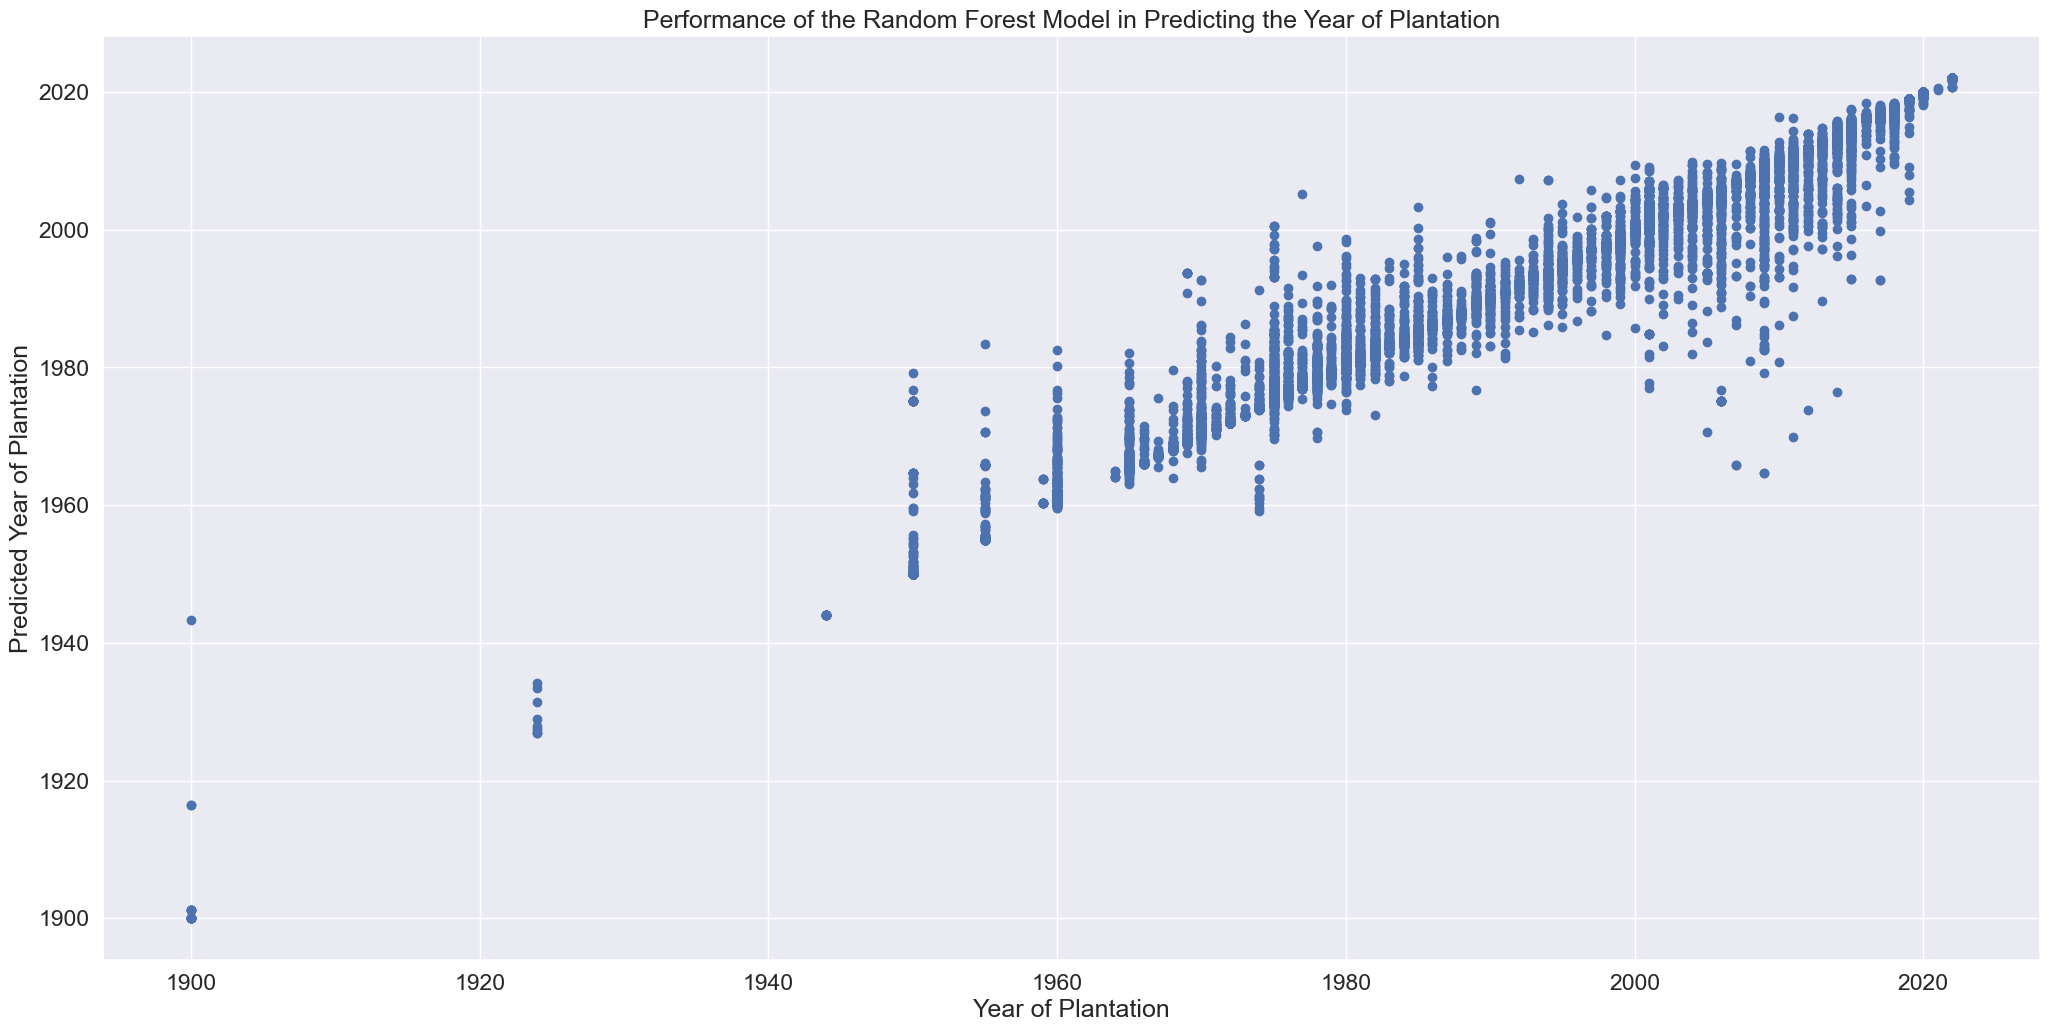

In [11]:
X_train_predictions = forest_reg.predict(X_train_prepared)
forest_rmse = mean_squared_error(y_train, X_train_predictions, squared=False)
forest_mae = mean_absolute_error(y_train, X_train_predictions)

print(f"RMSE: {round(forest_rmse,2)}")
print(f"MAE: around {round(forest_mae, 2)} year")

plt.scatter(y_train, X_train_predictions)
plt.xlabel("Year of Plantation")
plt.ylabel("Predicted Year of Plantation")
plt.title("Performance of the Random Forest Model in Predicting the Year of Plantation")
plt.show()

<span style="color:Orange">

### Support Vector Machine
</span>

In [12]:
svm_reg = LinearSVR(dual='auto', C=1)
svm_reg.fit(X_train_prepared, y_train)

LinearSVR(C=1, dual='auto')

In [20]:
#svm_reg = SVR(kernel="poly", degree=2)
#svm_reg.fit(X_train_prepared, y_train)

RMSE: 15.58
MAE: around 5.79 year


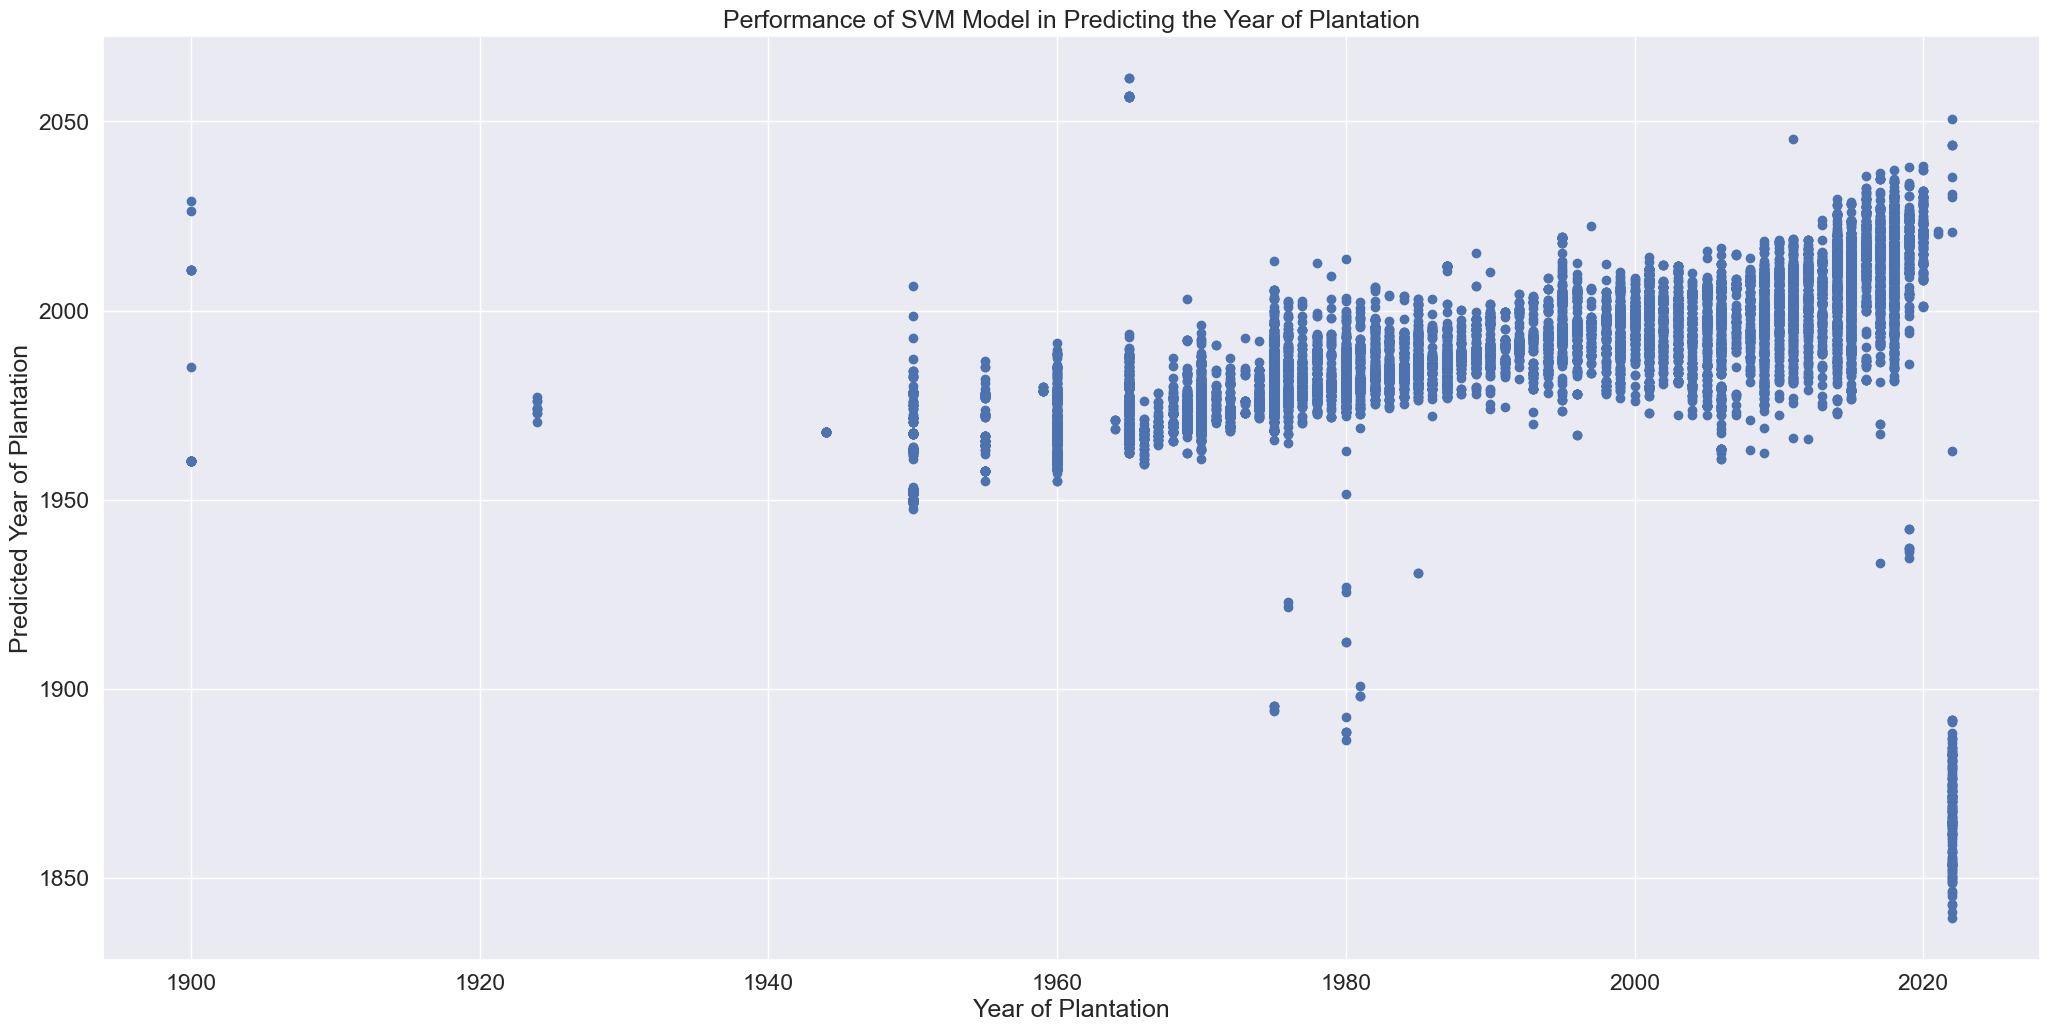

In [13]:
X_train_predictions = svm_reg.predict(X_train_prepared)
svm_rmse = mean_squared_error(y_train, X_train_predictions, squared=False)
svm_mae = mean_absolute_error(y_train, X_train_predictions)

print(f"RMSE: {round(svm_rmse,2)}")
print(f"MAE: around {round(svm_mae, 2)} year")

plt.scatter(y_train, X_train_predictions)
plt.xlabel("Year of Plantation")
plt.ylabel("Predicted Year of Plantation")
plt.title("Performance of SVM Model in Predicting the Year of Plantation")
plt.show()

<span style="color:Orange">

### Cross Validation
</span>

In [14]:
def display_scores(model, cv):
    scores = cross_val_score(model, X_train_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)
    rmse = np.sqrt(-scores)
    return model, rmse.mean(), rmse.std()

In [15]:
models = [lin_reg, tree_reg, forest_reg, svm_reg]
results = []

for i in models:
    results.append(display_scores(i, 10))

In [16]:
cross_validation = pd.DataFrame(results)
cross_validation.columns = ['Model', 'Mean', 'Std']
cross_validation.sort_values('Mean')

,Model,Mean,Std
2,"(DecisionTreeRegressor(max_features=1.0, rando...",5.631123,0.233073
1,DecisionTreeRegressor(),6.427172,0.293362
0,LinearRegression(),7.677593,0.312922
3,"LinearSVR(C=1, dual='auto')",18.494983,2.214944


<span style="color:Orange">

### Hyperparameter Fine Tuning/Grid Search
</span>

In [19]:
param_grid = [
    {'n_estimators': [300, 600], 'max_features': [4, 6, 8, 12]},
  ]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [4, 6, 8, 12],
                          'n_estimators': [300, 600]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [20]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 300}

In [21]:
cvres = grid_search.cv_results_
results = []

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    result = np.sqrt(-mean_score), params
    results.append(result)

gridsearch = pd.DataFrame(results)
gridsearch.columns = ['Mean', 'Parameters']
gridsearch.sort_values('Mean')

,Mean,Parameters
0,5.545964,"{'max_features': 4, 'n_estimators': 300}"
5,5.547827,"{'max_features': 8, 'n_estimators': 600}"
2,5.553383,"{'max_features': 6, 'n_estimators': 300}"
4,5.553713,"{'max_features': 8, 'n_estimators': 300}"
3,5.553799,"{'max_features': 6, 'n_estimators': 600}"
1,5.554462,"{'max_features': 4, 'n_estimators': 600}"
7,5.555476,"{'max_features': 12, 'n_estimators': 600}"
6,5.570148,"{'max_features': 12, 'n_estimators': 300}"


<span style="color:Orange">

## Final Model
</span>

RMSE 5.2
Confidence interval for RMSE:  [4.80016464 5.56675073]

 MAE: 2.2 years.


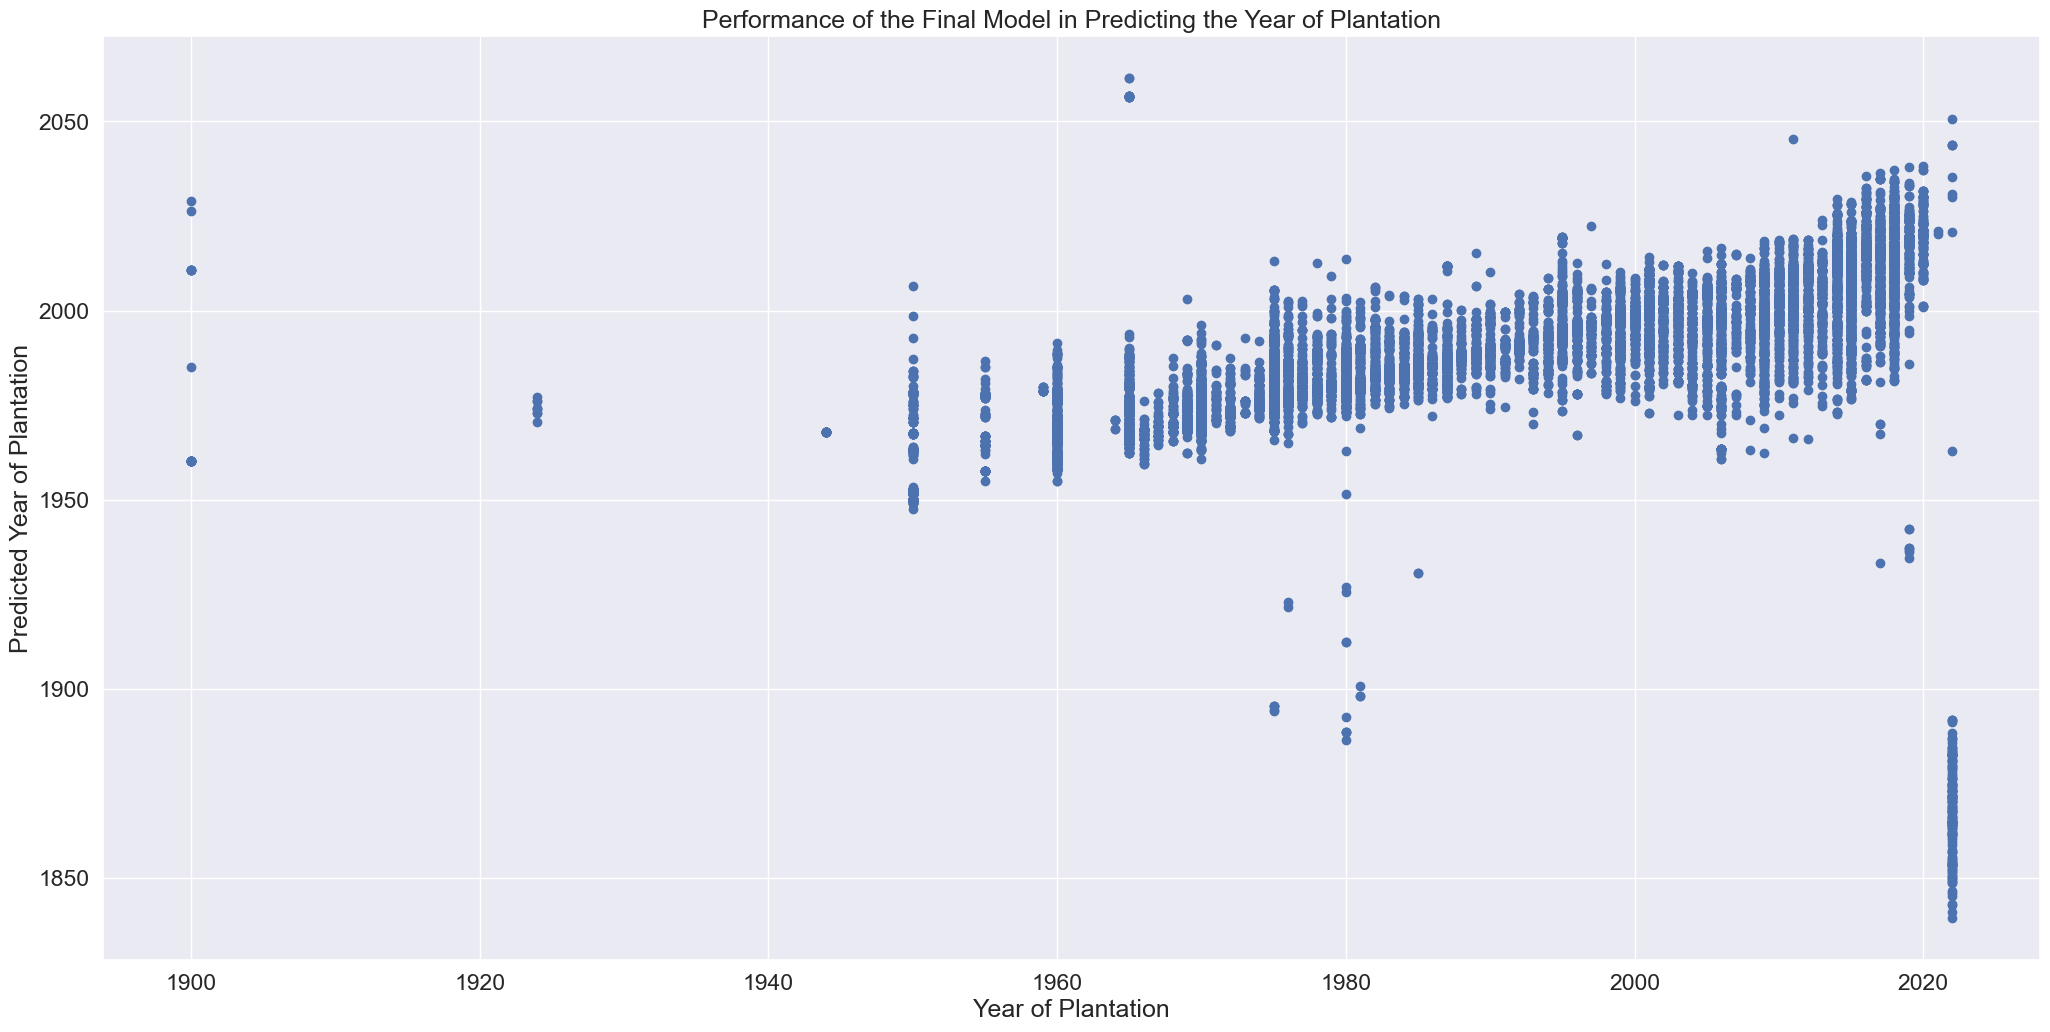

In [22]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test_prepared)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(f"RMSE {round(final_rmse,2)}")

from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
confidence_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))
print("Confidence interval for RMSE: ", confidence_interval)

final_mae = mean_absolute_error(y_test, final_predictions)
print(f"\n MAE: {round(final_mae,2)} years.")

plt.scatter(y_train, X_train_predictions)
plt.xlabel("Year of Plantation")
plt.ylabel("Predicted Year of Plantation")
plt.title("Performance of the Final Model in Predicting the Year of Plantation")
plt.show()

<span style="color:Orange">

## Predicting Year of Plantation when unknown
</span>